
# Customer Churn & Retention Analysis —  Project

**Dataset:** `customer_data.csv` (Telco/ISP customer dataset)  
**Author:** Hoàng Mạnh

---

## 🎯 Project Objectives
1. Understand customer and service data.  
2. Clean and standardize the dataset (handle missing values, outliers, and data types).  
3. Perform Exploratory Data Analysis (EDA) to uncover churn insights.  
4. Estimate the financial impact of customer churn.  
5. Build a baseline churn prediction model to identify key influencing factors.  

> **How to use:** Run the notebook **top-to-bottom**. Each section includes **explanations** and **code**.



## 1) Environment Setup & Data Loading
- Import the necessary libraries.  
- Read the CSV file.  
- Preview the first 10 rows to understand the structure.  


In [2]:
DATA_PATH = r"C:\Users\ADMIN\Desktop\Churn-Prediction-Retention-Strategy\data\customer_data.csv"

import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read data
df = pd.read_csv(DATA_PATH)
print("Shape:", df.shape)
df.head(10)


Shape: (6418, 32)


,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19877-DEL,Male,35,No,Delhi,7,27,NaN,Yes,No,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,NaN,Yes,Yes,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,NaN,Yes,No,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
5,32750-TEL,Male,24,No,Telangana,9,2,Deal 5,Yes,No,...,Credit Card,69.40,571.45,0.00,0,150.93,722.38,Stayed,NaN,NaN
6,84741-MAH,Female,66,Yes,Maharashtra,9,23,Deal 1,Yes,No,...,Bank Withdrawal,109.70,7904.25,0.00,0,707.16,8611.41,Stayed,NaN,NaN
7,65618-GUJ,Male,51,Yes,Gujarat,12,24,Deal 2,Yes,Yes,...,Credit Card,84.65,5377.80,0.00,20,816.48,6214.28,Stayed,NaN,NaN
8,64233-GUJ,Female,63,No,Gujarat,4,10,Deal 5,Yes,No,...,Bank Withdrawal,48.20,340.35,0.00,0,73.71,414.06,Stayed,NaN,NaN
9,23612-UTT,Female,41,No,Uttar Pradesh,3,1,NaN,Yes,Yes,...,Credit Card,90.45,5957.90,0.00,0,1849.90,7807.80,Stayed,NaN,NaN



## 2) Data Understanding
- Check data types and overall info.  
- Inspect missing values.  
- Review summary statistics for numerical features.  


In [3]:
# Data types & info
display(df.dtypes)
print("\nInfo:")
print(df.info())

Customer_ID                     object
Gender                          object
Age                              int64
Married                         object
State                           object
Number_of_Referrals              int64
Tenure_in_Months                 int64
Value_Deal                      object
Phone_Service                   object
Multiple_Lines                  object
Internet_Service                object
Internet_Type                   object
Online_Security                 object
Online_Backup                   object
Device_Protection_Plan          object
Premium_Support                 object
Streaming_TV                    object
Streaming_Movies                object
Streaming_Music                 object
Unlimited_Data                  object
Contract                        object
Paperless_Billing               object
Payment_Method                  object
Monthly_Charge                 float64
Total_Charges                  float64
Total_Refunds            


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6418 entries, 0 to 6417
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  6418 non-null   object 
 1   Gender                       6418 non-null   object 
 2   Age                          6418 non-null   int64  
 3   Married                      6418 non-null   object 
 4   State                        6418 non-null   object 
 5   Number_of_Referrals          6418 non-null   int64  
 6   Tenure_in_Months             6418 non-null   int64  
 7   Value_Deal                   2870 non-null   object 
 8   Phone_Service                6418 non-null   object 
 9   Multiple_Lines               5796 non-null   object 
 10  Internet_Service             6418 non-null   object 
 11  Internet_Type                5028 non-null   object 
 12  Online_Security              5028 non-null   object 
 13  Online_Back

In [4]:
# Missing values
missing = df.isna().sum().sort_values(ascending=False)
print("\nMissing values (top 20):")
print(missing.head(20))


Missing values (top 20):
Churn_Category            4686
Churn_Reason              4686
Value_Deal                3548
Online_Backup             1390
Online_Security           1390
Internet_Type             1390
Device_Protection_Plan    1390
Premium_Support           1390
Streaming_Movies          1390
Streaming_TV              1390
Unlimited_Data            1390
Streaming_Music           1390
Multiple_Lines             622
Number_of_Referrals          0
Tenure_in_Months             0
Customer_ID                  0
Phone_Service                0
Internet_Service             0
Age                          0
Gender                       0
dtype: int64


In [5]:
# Summary statistics for numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
desc = df[num_cols].describe().T
desc

,count,mean,std,min,25%,50%,75%,max
Age,6418.0,47.070739,16.703633,18.00,33.0000,46.000,60.0000,85.00
Number_of_Referrals,6418.0,7.427859,4.621519,0.00,3.0000,7.000,11.0000,15.00
Tenure_in_Months,6418.0,17.342786,10.576391,1.00,8.0000,16.000,27.0000,36.00
Monthly_Charge,6418.0,63.652867,31.188823,-10.00,30.5625,70.100,89.7500,118.75
Total_Charges,6418.0,2280.374858,2268.049985,18.80,395.7250,1396.125,3783.6000,8684.80
Total_Refunds,6418.0,1.924944,7.849083,0.00,0.0000,0.000,0.0000,49.79
Total_Extra_Data_Charges,6418.0,6.718604,24.722533,0.00,0.0000,0.000,0.0000,150.00
Total_Long_Distance_Charges,6418.0,748.703468,847.672844,0.00,70.8050,407.475,1182.9175,3564.72
Total_Revenue,6418.0,3033.871987,2866.505426,21.36,603.7425,2108.635,4801.5375,11979.34



### 2.1) Target Variable
We define churn using the `Customer_Status` column:  
- `Churned` → 1  
- Others (Stayed/Joined) → 0  


In [6]:

df['is_churn'] = (df['Customer_Status'].astype(str).str.strip().str.lower() == 'churned').astype(int)

print(df['Customer_Status'].value_counts(dropna=False))
print("\nOverall churn rate: {:.2%}".format(df['is_churn'].mean()))

Customer_Status
Stayed     4275
Churned    1732
Joined      411
Name: count, dtype: int64

Overall churn rate: 26.99%



## 3) Data Cleaning

### 3.1) Normalize text values
- Strip extra whitespaces for all string columns.


In [7]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

def normalize_str(s):
    if pd.isna(s):
        return s
    return str(s).strip()

for c in cat_cols:
    df[c] = df[c].apply(normalize_str)

print("Normalized string values for", len(cat_cols), "columns.")

Normalized string values for 23 columns.



### 3.2) Handle Missing Values & Outliers
**Baseline strategy:**  
- For service-like categorical columns, fill missing with `"Unknown"`.  
- For churn-related text (`Churn_Category`, `Churn_Reason`), fill `"Unknown"` to simplify aggregations.  
- For negative numeric outliers (e.g., `Monthly_Charge < 0`), set to NaN then impute with median.  
- Impute remaining numeric NaNs with column medians.  

> In production, you might use business rules (e.g., if `Internet_Service == "No"` then streaming = `"No"`). Here we keep assumptions minimal.


In [8]:

service_like_cols = [
    'Value_Deal', 'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type',
    'Online_Security', 'Online_Backup', 'Device_Protection_Plan', 'Premium_Tech_Support',
    'Streaming_TV', 'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data',
    'Contract', 'Paperless_Billing', 'Payment_Method', 'Churn_Category', 'Churn_Reason'
]
service_like_cols = [c for c in service_like_cols if c in df.columns]

for c in service_like_cols:
    df[c] = df[c].fillna('Unknown')

if 'Monthly_Charge' in df.columns:
    neg_count = (df['Monthly_Charge'] < 0).sum()
    if neg_count > 0:
        print("Monthly_Charge has", neg_count, "negative values -> set NaN to impute with median.")
        df.loc[df['Monthly_Charge'] < 0, 'Monthly_Charge'] = np.nan

# Median imputation for numeric columns
for c in df.select_dtypes(include=[np.number]).columns:
    if df[c].isna().any():
        df[c] = df[c].fillna(df[c].median())

# Re-check missing
df.isna().sum().sort_values(ascending=False).head(10)


Monthly_Charge has 107 negative values -> set NaN to impute with median.


Premium_Support        1390
Customer_ID               0
Gender                    0
Married                   0
Age                       0
Number_of_Referrals       0
Tenure_in_Months          0
Value_Deal                0
State                     0
Phone_Service             0
dtype: int64


### 3.3) Light Feature Engineering
- **Age_Group**: bin continuous Age into groups.  
- **Tenure_Years**: convert months → years.  
- **Avg_Charge_per_Tenure**: `Total_Charges / max(Tenure_in_Months, 1)`.  


In [9]:
# Age group
if 'Age' in df.columns:
    bins = [0, 24, 34, 44, 54, 64, 200]
    labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
    df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Tenure in years
if 'Tenure_in_Months' in df.columns:
    df['Tenure_Years'] = df['Tenure_in_Months'] / 12.0

# Average monthly charge over tenure
if set(['Total_Charges','Tenure_in_Months']).issubset(df.columns):
    df['Avg_Charge_per_Tenure'] = df['Total_Charges'] / df['Tenure_in_Months'].replace({0:np.nan})
    df['Avg_Charge_per_Tenure'] = df['Avg_Charge_per_Tenure'].fillna(0.0)

df.head(5)

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason,is_churn,Age_Group,Tenure_Years,Avg_Charge_per_Tenure
0,19877-DEL,Male,35,No,Delhi,7,27,Unknown,Yes,No,...,0,381.51,974.81,Stayed,Unknown,Unknown,0,35-44,2.250000,21.974074
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,Unknown,Yes,Yes,...,10,96.21,610.28,Stayed,Unknown,Unknown,0,45-54,1.083333,41.723077
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,0,134.60,415.45,Churned,Competitor,Competitor had better devices,1,45-54,2.916667,8.024286
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,...,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,1,65+,1.750000,58.945238
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,Unknown,Yes,No,...,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,1,65+,0.666667,33.425000



## 4) Exploratory Data Analysis (EDA)
### 4.1) Overall churn rate and counts


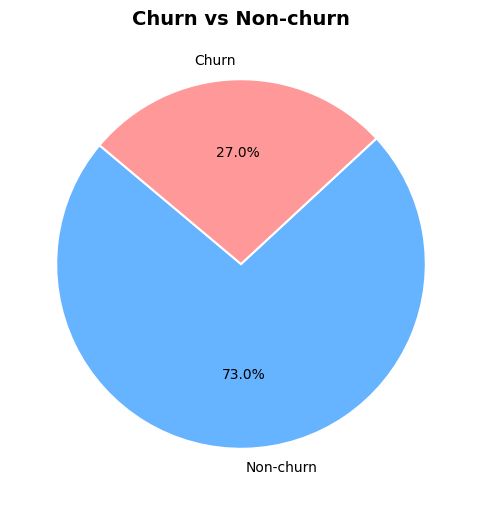

In [10]:
counts = df['is_churn'].value_counts().sort_index()
labels = ['Non-churn', 'Churn']  
colors = ['#66b3ff', '#ff9999']  

plt.figure(figsize=(6, 6))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)

plt.title('Churn vs Non-churn', fontsize=14, fontweight='bold')
plt.show()


### 4.2) Churn by Contract


Contract
Month-to-Month    0.465307
One Year          0.110403
Two Year          0.027341
Name: is_churn, dtype: float64


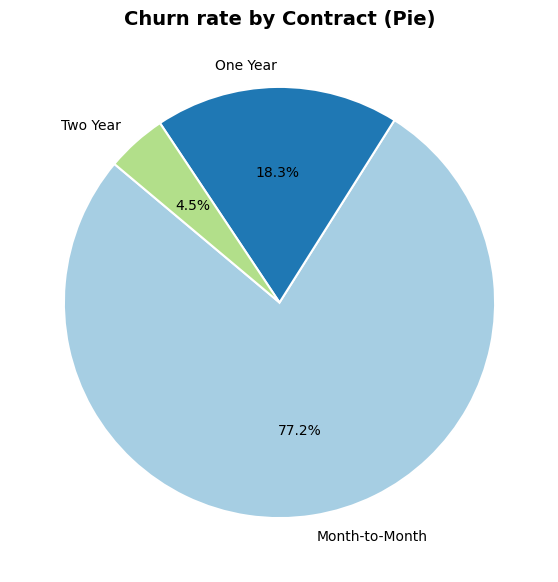

In [11]:
if 'Contract' in df.columns:
    tmp = df.groupby('Contract')['is_churn'].mean().sort_values(ascending=False)
    print(tmp)

    # Vẽ pie chart
    plt.figure(figsize=(7, 7))
    plt.pie(
        tmp,
        labels=tmp.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Paired.colors,  # bảng màu đẹp
        wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
    )
    plt.title('Churn rate by Contract (Pie)', fontsize=14, fontweight='bold')
    plt.show()

else:
    print("Column 'Contract' not found.")


### 4.3) Churn by Internet Type


Internet_Type
Fiber Optic    0.410999
Cable          0.257218
DSL            0.193742
Unknown        0.078417
Name: is_churn, dtype: float64


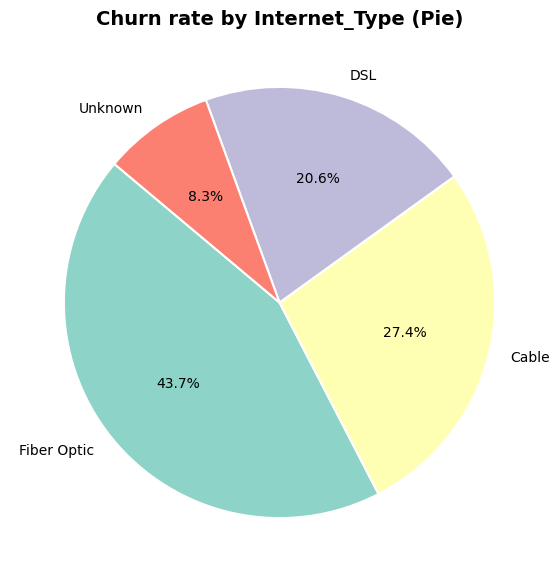

In [12]:
if 'Internet_Type' in df.columns:
    tmp = df.groupby('Internet_Type')['is_churn'].mean().sort_values(ascending=False)
    print(tmp)
    
    # Pie chart
    plt.figure(figsize=(7,7))
    plt.pie(
        tmp,
        labels=tmp.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Set3.colors,  
        wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
    )
    plt.title('Churn rate by Internet_Type (Pie)', fontsize=14, fontweight='bold')
    plt.show()

else:
    print("Column 'Internet_Type' not found.")


### 4.4) Distribution of Tenure and Monthly Charge


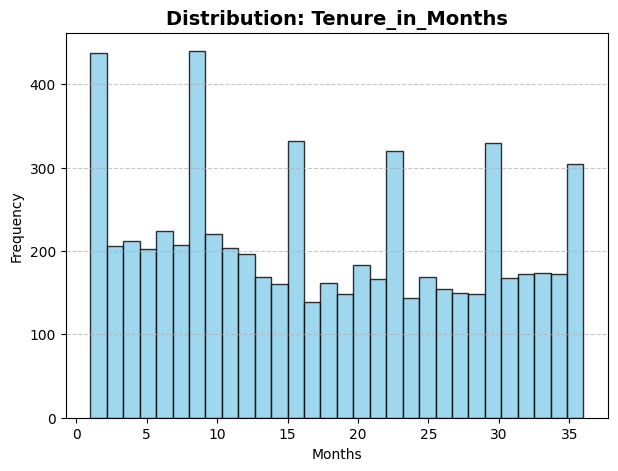

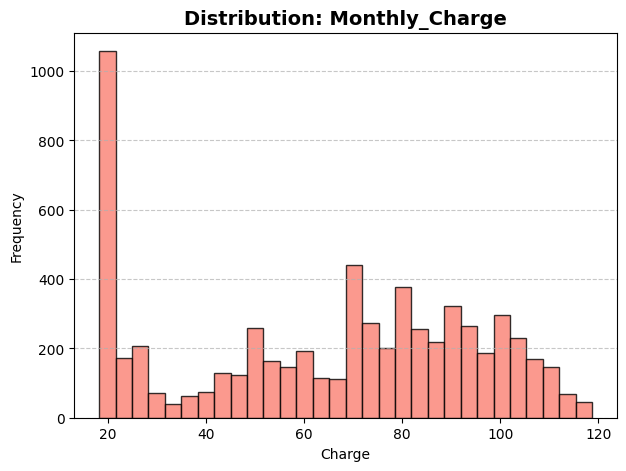

In [13]:
# Tenure histogram
if 'Tenure_in_Months' in df.columns:
    plt.figure(figsize=(7,5))
    plt.hist(
        df['Tenure_in_Months'].dropna(),
        bins=30,
        color='skyblue',
        edgecolor='black',
        alpha=0.8
    )
    plt.title('Distribution: Tenure_in_Months', fontsize=14, fontweight='bold')
    plt.xlabel('Months')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Monthly_Charge histogram
if 'Monthly_Charge' in df.columns:
    plt.figure(figsize=(7,5))
    plt.hist(
        df['Monthly_Charge'].dropna(),
        bins=30,
        color='salmon',
        edgecolor='black',
        alpha=0.8
    )
    plt.title('Distribution: Monthly_Charge', fontsize=14, fontweight='bold')
    plt.xlabel('Charge')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


### 4.5) Revenue by Customer Status


Customer_Status
Stayed     16010148.27
Churned     3411960.58
Joined        49281.56
Name: Total_Revenue, dtype: float64


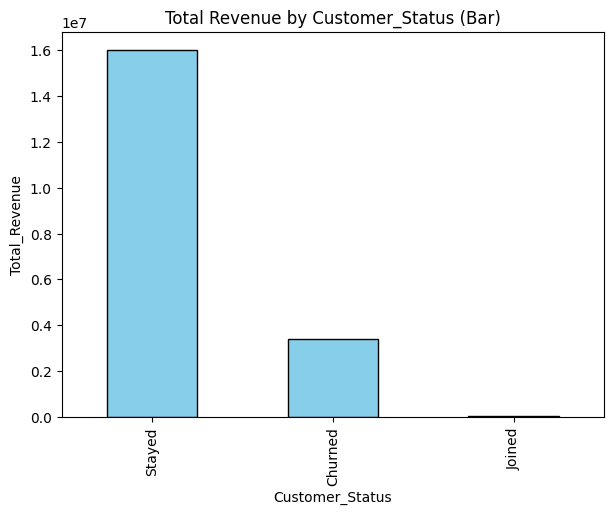

In [14]:
if set(['Customer_Status','Total_Revenue']).issubset(df.columns):
    tmp = df.groupby('Customer_Status')['Total_Revenue'].sum().sort_values(ascending=False)
    print(tmp)

    # Bar chart
    plt.figure(figsize=(7,5))
    tmp.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Total Revenue by Customer_Status (Bar)')
    plt.xlabel('Customer_Status')
    plt.ylabel('Total_Revenue')
    plt.show()
else:
    print("Columns not found.")


### 4.6) Correlation Matrix (Numeric Features)


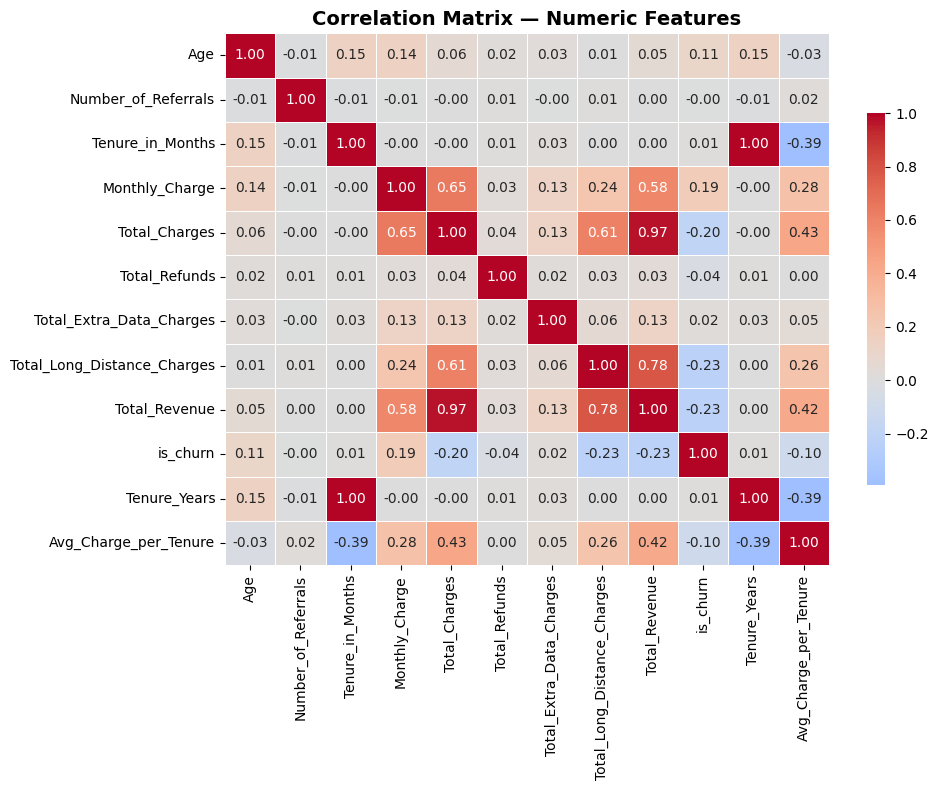

In [15]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr = df[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,          
    fmt=".2f",           
    cmap="coolwarm",     
    center=0,            
    linewidths=0.5,      
    cbar_kws={"shrink": .7}  
)
plt.title("Correlation Matrix — Numeric Features", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


## 5) Business Insights from EDA

### 5.1) Segments with higher churn
Focus on groups with **above-average** churn rate across key categorical variables (e.g., `Contract`, `Internet_Type`, `Age_Group`, `Payment_Method`).


In [16]:
insights = {}

overall = df['is_churn'].mean()

def churn_by(col):
    if col in df.columns:
        g = df.groupby(col)['is_churn'].mean().sort_values(ascending=False)
        return g
    return None

for col in ['Contract','Internet_Type','Age_Group','Gender','Paperless_Billing','Payment_Method']:
    g = churn_by(col)
    if g is not None:
        insights[col] = g

for k, v in insights.items():
    print("\n==== Churn by:", k, "====")
    print(v)
    print("Above-average groups:")
    print(v[v > overall])


==== Churn by: Contract ====
Contract
Month-to-Month    0.465307
One Year          0.110403
Two Year          0.027341
Name: is_churn, dtype: float64
Above-average groups:
Contract
Month-to-Month    0.465307
Name: is_churn, dtype: float64

==== Churn by: Internet_Type ====
Internet_Type
Fiber Optic    0.410999
Cable          0.257218
DSL            0.193742
Unknown        0.078417
Name: is_churn, dtype: float64
Above-average groups:
Internet_Type
Fiber Optic    0.410999
Name: is_churn, dtype: float64

==== Churn by: Age_Group ====
Age_Group
65+      0.398058
55-64    0.267618
35-44    0.242326
25-34    0.241963
45-54    0.229113
<25      0.221269
Name: is_churn, dtype: float64
Above-average groups:
Age_Group
65+    0.398058
Name: is_churn, dtype: float64

==== Churn by: Gender ====
Gender
Female    0.274457
Male      0.262025
Name: is_churn, dtype: float64
Above-average groups:
Gender
Female    0.274457
Name: is_churn, dtype: float64

==== Churn by: Paperless_Billing ====
Paperless_Bi

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6372\1843507705.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df.groupby(col)['is_churn'].mean().sort_values(ascending=False)



### 5.2) Top Churn Reasons (if available)


Churn_Reason
Competitor had better devices                289
Competitor made better offer                 274
Attitude of support person                   208
Don't know                                   124
Competitor offered more data                 106
Attitude of service provider                  93
Competitor offered higher download speeds     92
Price too high                                72
Product dissatisfaction                       71
Network reliability                           66
Name: count, dtype: int64


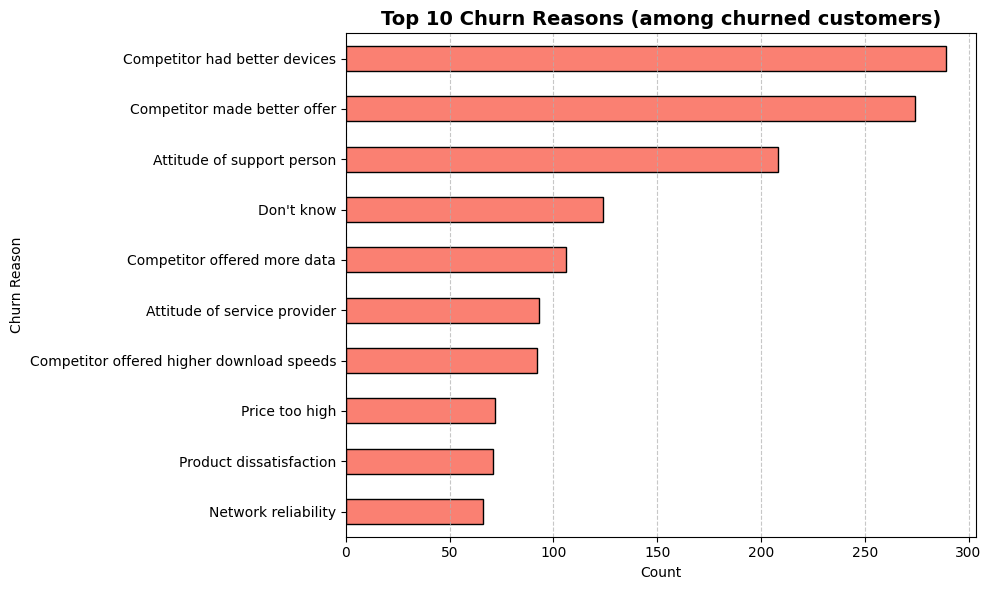

In [17]:
if 'Churn_Reason' in df.columns:
    reason_counts = (
        df.loc[df['is_churn'] == 1, 'Churn_Reason']
          .value_counts()
          .head(10)
    )
    print(reason_counts)

    # Horizontal bar chart
    plt.figure(figsize=(10, 6))
    reason_counts.sort_values().plot(
        kind='barh',
        color='salmon',
        edgecolor='black'
    )
    
    plt.title('Top 10 Churn Reasons (among churned customers)', fontsize=14, fontweight='bold')
    plt.xlabel('Count')
    plt.ylabel('Churn Reason')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


### 5.3) Financial Impact Estimation
- **Monthly revenue at risk**: Sum of `Monthly_Charge` among churned customers.  
- **Revenue concentration**: Compare `Total_Revenue` between churned and non-churned groups.  
> This is a rough estimate; a full LTV model would consider remaining contract terms, ARPU, etc.


Monthly revenue at risk (approx.): 128652.9
Total_Revenue (churned): 3411960.58
Total_Revenue (non-churned): 16059429.830000002


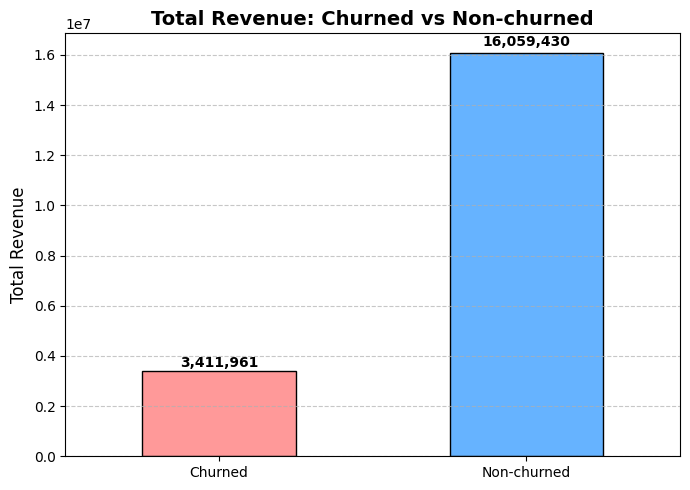

In [18]:
monthly_at_risk = 0.0
if 'Monthly_Charge' in df.columns:
    monthly_at_risk = df.loc[df['is_churn']==1, 'Monthly_Charge'].sum()

total_rev_churn = df.loc[df['is_churn']==1, 'Total_Revenue'].sum() if 'Total_Revenue' in df.columns else np.nan
total_rev_nonchurn = df.loc[df['is_churn']==0, 'Total_Revenue'].sum() if 'Total_Revenue' in df.columns else np.nan

print("Monthly revenue at risk (approx.):", monthly_at_risk)
print("Total_Revenue (churned):", total_rev_churn)
print("Total_Revenue (non-churned):", total_rev_nonchurn)

if 'Total_Revenue' in df.columns:
    revenue_data = pd.Series({
        'Churned': total_rev_churn,
        'Non-churned': total_rev_nonchurn
    })

    plt.figure(figsize=(7, 5))
    ax = revenue_data.plot(
        kind='bar',
        color=['#ff9999', '#66b3ff'],
        edgecolor='black'
    )

    # Thêm số liệu trên đầu cột (đặt cao hơn bar một chút)
    for i, val in enumerate(revenue_data):
        ax.text(
            i, 
            val * 1.01,                # cao hơn 1% so với bar
            f"{val:,.0f}", 
            ha='center', va='bottom',
            fontsize=10, fontweight='bold'
        )

    plt.title('Total Revenue: Churned vs Non-churned', fontsize=14, fontweight='bold')
    plt.ylabel('Total Revenue', fontsize=12)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

## 6) Baseline Churn Prediction

**Goal:**  
- Estimate churn probability and identify influential factors.  

**Notes:**  
- Use only `Stayed` vs `Churned` (drop `Joined`).  
- One-hot encode categorical features.  
- Train/test split, report **accuracy**, **ROC‑AUC**, **confusion matrix**.  


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [20]:
RANDOM_SEED = 42
# Filter to Stayed vs Churned
mask_model = df['Customer_Status'].isin(['Stayed','Churned']) if 'Customer_Status' in df.columns else df['is_churn'].notna()
dfm = df.loc[mask_model].copy()

# Prepare X, y
drop_cols = []
for c in ['Customer_ID','Customer_Status','Churn_Category','Churn_Reason']:
    if c in dfm.columns:
        drop_cols.append(c)

X = dfm.drop(columns=drop_cols + ['is_churn'], errors='ignore')
y = dfm['is_churn'].values

# One-hot encode
num_cols_model = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols_model = X.select_dtypes(exclude=[np.number]).columns.tolist()
X_enc = pd.get_dummies(X, columns=cat_cols_model, dummy_na=False)

X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y)

# Scale for Logistic Regression (sparse-friendly: with_mean=False)
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
logit = LogisticRegression(max_iter=200, n_jobs=None)
logit.fit(X_train_scaled, y_train)
proba_logit = logit.predict_proba(X_test_scaled)[:,1]
pred_logit = (proba_logit >= 0.5).astype(int)

# Random Forest
rf = RandomForestClassifier(n_estimators=300, random_state=RANDOM_SEED, n_jobs=-1)
rf.fit(X_train, y_train)
proba_rf = rf.predict_proba(X_test)[:,1]
pred_rf = (proba_rf >= 0.5).astype(int)

In [21]:
def eval_model(name, y_true, y_pred, y_proba):
    acc = accuracy_score(y_true, y_pred)
    try:
        auc = roc_auc_score(y_true, y_proba)
    except:
        auc = np.nan
    print(f"\n=== {name} ===")
    print("Accuracy:", acc)
    print("ROC-AUC:", auc)
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

eval_model("Logistic Regression", y_test, pred_logit, proba_logit)
eval_model("Random Forest", y_test, pred_rf, proba_rf)


=== Logistic Regression ===
Accuracy: 0.8302828618968386
ROC-AUC: 0.8714394054300015
Confusion Matrix:
 [[770  85]
 [119 228]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88       855
           1       0.73      0.66      0.69       347

    accuracy                           0.83      1202
   macro avg       0.80      0.78      0.79      1202
weighted avg       0.83      0.83      0.83      1202


=== Random Forest ===
Accuracy: 0.8502495840266223
ROC-AUC: 0.8939902590289364
Confusion Matrix:
 [[805  50]
 [130 217]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       855
           1       0.81      0.63      0.71       347

    accuracy                           0.85      1202
   macro avg       0.84      0.78      0.80      1202
weighted avg       0.85      0.85      0.84      1202



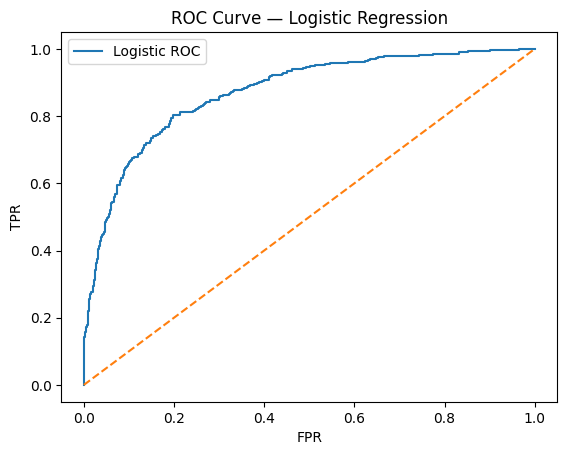

In [22]:
# ROC curves (separate figures)
fpr_l, tpr_l, _ = roc_curve(y_test, proba_logit)
plt.figure()
plt.plot(fpr_l, tpr_l, label='Logistic ROC')
plt.plot([0,1],[0,1],'--')
plt.title('ROC Curve — Logistic Regression')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

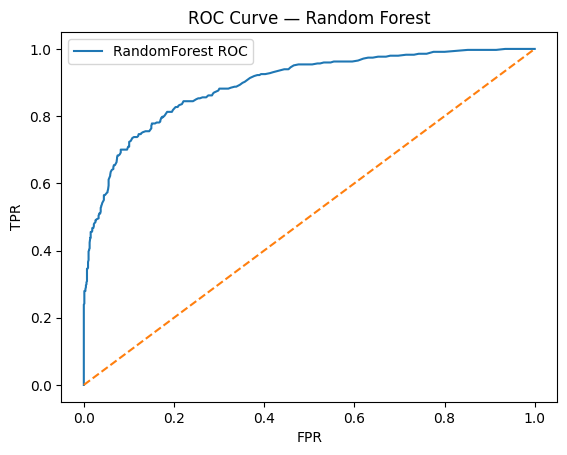

In [23]:
fpr_r, tpr_r, _ = roc_curve(y_test, proba_rf)
plt.figure()
plt.plot(fpr_r, tpr_r, label='RandomForest ROC')
plt.plot([0,1],[0,1],'--')
plt.title('ROC Curve — Random Forest')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()


Top 20 feature importances (RandomForest):
Total_Charges                  0.095924
Total_Revenue                  0.092734
Contract_Month-to-Month        0.073584
Avg_Charge_per_Tenure          0.061463
Total_Long_Distance_Charges    0.057036
Monthly_Charge                 0.051187
Age                            0.038510
Contract_Two Year              0.033246
Tenure_in_Months               0.028111
Tenure_Years                   0.027757
Online_Security_No             0.026282
Number_of_Referrals            0.025517
Premium_Support_No             0.020223
Internet_Type_Fiber Optic      0.019336
Contract_One Year              0.015089
Value_Deal_Deal 5              0.012523
Premium_Support_Yes            0.011217
Payment_Method_Credit Card     0.010986
Age_Group_65+                  0.010029
Online_Backup_No               0.009923
dtype: float64


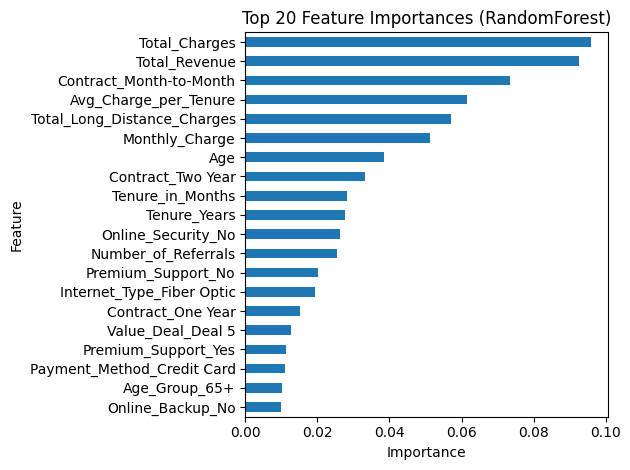

In [24]:
# Feature importances (RandomForest)
importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(20)
print("\nTop 20 feature importances (RandomForest):")
print(importances)

plt.figure()
importances.sort_values().plot(kind='barh')
plt.title('Top 20 Feature Importances (RandomForest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


## 7) Export Cleaned Dataset (optional)
Save a cleaned version for BI dashboards or downstream modeling.


In [26]:
clean_path = r"C:\Users\ADMIN\Desktop\Churn-Prediction-Retention-Strategy\customer_data_cleaned.csv"
df.to_csv(clean_path, index=False)
print("Saved cleaned dataset to:", clean_path)


Saved cleaned dataset to: C:\Users\ADMIN\Desktop\Churn-Prediction-Retention-Strategy\customer_data_cleaned.csv



## 8) Conclusions & Next Steps
- Summarize the highest-risk churn segments (e.g., specific contracts, internet types, low tenure, higher charges).  
- Propose retention experiments (renewal incentives, targeted plan migration).  
- Enrich with support/ticket data to analyze service issues.  
- Operationalize a scheduled cleaning + dashboard refresh pipeline.  

**Next:** Build a **Power BI / Tableau dashboard** using the cleaned dataset:  
- KPI: churn rate, MRR/ARR at risk, churn by segment.  
- Drill‑down: Contract, Internet_Type, Age_Group, State.  
- Storyline: root causes and actionable recommendations.  
